In [75]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

**(1)** Функция косинуса с проихвольной частотой:

In [76]:
def cosinus(t, T):
    A = 2
    w = (2 * np.pi) / T

    return A * np.cos(w * t)

<!-- Реализация `DFT_slow` взята из методички Козулина -->

https://math.stackexchange.com/questions/30464/what-is-the-difference-between-the-discrete-fourier-transform-and-the-fast-fouri

In [77]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float) # Переводим временное пр-е сигнала в np.array
    N = x.shape[0] # Находим длину пр-я сигнала (сколько "точек" (сэмплов) в сигнале)
    n = np.arange(N) # Строим массив временных значений от начала до конца сигнала
    k = n.reshape((N, 1)) # Переводим n из вектор-строки в вектор-столбец
    M = np.exp(-2j * np.pi * k * n / N) # Матрица комплексных exp. ф-ий (REAL cos, IMAG. sin),
                                        # где каждая строка означает частоту в Гц,
                                        # а каждая строка -- временное значение сигнала.
    return np.dot(M, x) # Выполняем матричное умножение, чем домножаем каждую
                        # представленную в матрице компл. эксп. частоту на её
                        # "мощность" во временном пр-ии, заодно отрбасываем
                        # (*0) те частоты, которые в сигнале не представлены.

#cos_test = list(map(lambda a: cosinus(a, (1/10)), np.arange(0, 0.1, 0.01)))
#cos_test_dft = DFT_slow(cos_test)

Оценка времени вычисления **(1а)** и графики **(1б)**, <s>для 50 и 150 Гц соответственно</s>

Нужно совместить сигналы косинусоиды 50 и 150 Гц, и уже такой совмещённый сигнал <!--мучить-->анализировать

In [78]:
cos_time = np.arange(0, 0.2, 0.0001)

# TODO - поменять везде list(map()) на нормальную реализацию
# через массивы: [periodic_impulse(a, 2) for a in plot_t]
cos_50hz = list(map(lambda a: cosinus(a, (1/50)), cos_time))
cos_150hz = list(map(lambda a: cosinus(a, (1/150)), cos_time))

cos_values = np.add(cos_50hz, cos_150hz)

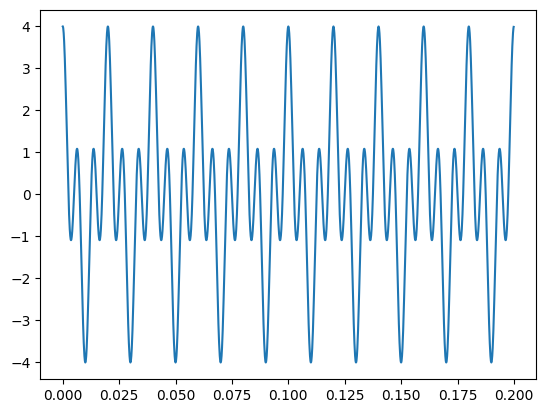

In [79]:
plt.plot(cos_time, cos_values)
plt.show()

In [80]:
cos_frequencies = np.fft.fftfreq(len(cos_time), d=0.0001)
cos_dft = DFT_slow(cos_values)
#cos_dft_ifft = np.fft.ifft(cos_dft)
#cos_dft_err = np.subtract(cos_dft_ifft, cos_values)
cos_fft = np.fft.fft(cos_values)
#cos_fft_ifft = np.fft.ifft(cos_fft)
#cos_fft_err = np.subtract(cos_fft_ifft, cos_values)

In [81]:
print('Время вычисления DFT и FFT (соответственно):')
%timeit DFT_slow(cos_values)
%timeit np.fft.fft(cos_values)

Время вычисления DFT и FFT (соответственно):
287 ms ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.6 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Если выше появляется `The slowest run took %d times longer than the fastest…`, то результат неверный, надо провести оценку ещё раз

In [82]:
def compare_DFT_FFT(time, freq, val, dft, fft, upscale=1):
    dft_ifft = np.fft.ifft(dft)
    fft_ifft = np.fft.ifft(fft)
    dft_err = np.subtract(dft_ifft, val)
    fft_err = np.subtract(fft_ifft, val)

    plt.figure(figsize=(12, 8))
    plt.suptitle('Разница между DFT (слева) и FFT (справа), и их точность относительно ориг. функции')

    plt.subplot(2, 2, 1)
    plt.plot(freq[0:len(freq)//(2*upscale)], cos_dft[0:len(freq)//(2*upscale)])

    plt.subplot(2, 2, 2)
    plt.plot(freq[0:len(freq)//(2*upscale)], cos_fft[0:len(freq)//(2*upscale)])

    plt.subplot(2, 2, 3)
    plt.plot(time, dft_err)

    plt.subplot(2, 2, 4)
    plt.plot(time, fft_err)
    
    plt.show()

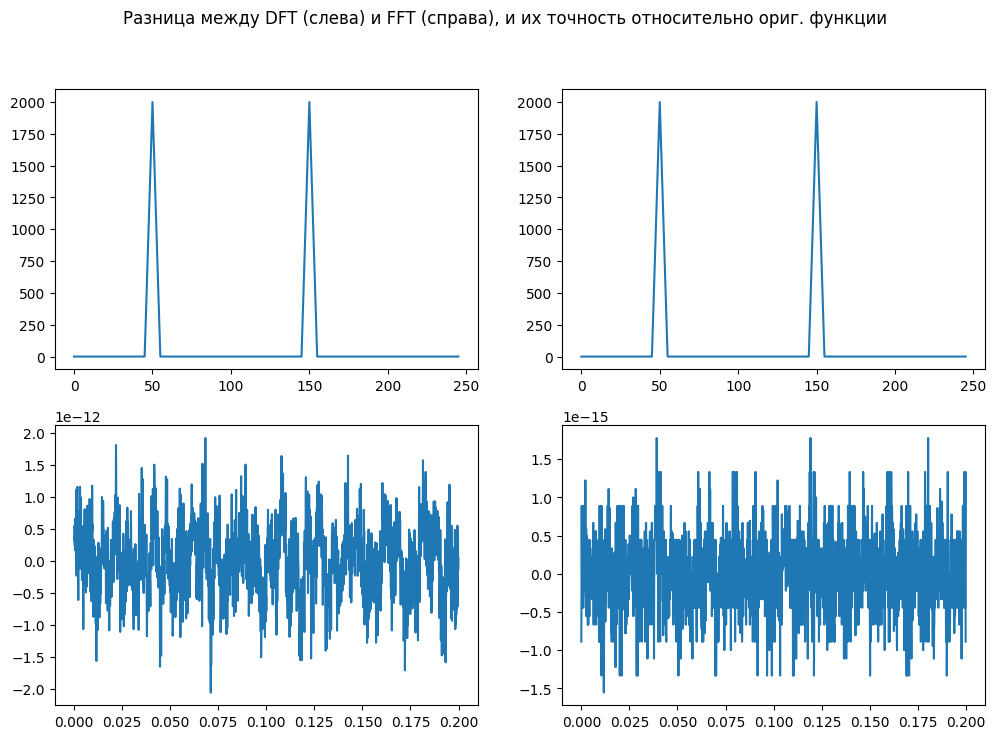

In [83]:
compare_DFT_FFT(cos_time, cos_frequencies, cos_values, cos_dft, cos_fft, 20)

**(1в)** Теперь зашумим этот сигнал и посмотрим, как он изменится:

In [84]:
cos_fft_noisy = cos_fft + np.random.normal(0, 10, cos_time.shape) # 1 из условий слишком мало

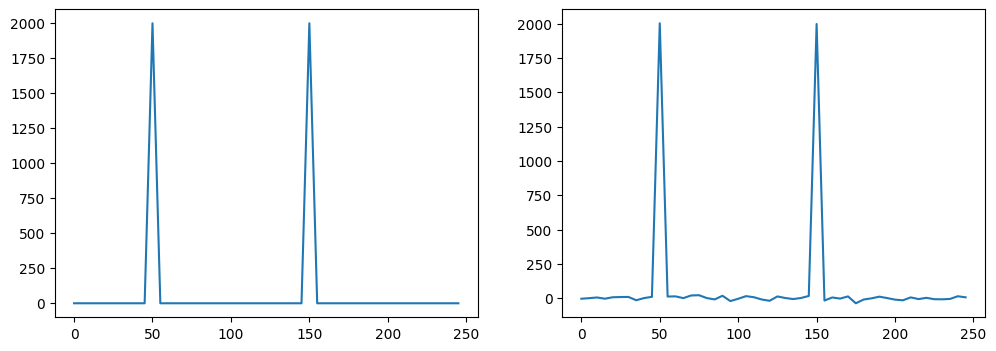

In [85]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_fft[0:len(cos_frequencies)//40])

plt.subplot(1, 2, 2)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_fft_noisy[0:len(cos_frequencies)//40])


In [86]:
cos_ifft = np.fft.ifft(cos_fft)
cos_ifft_noisy = np.fft.ifft(cos_fft_noisy)

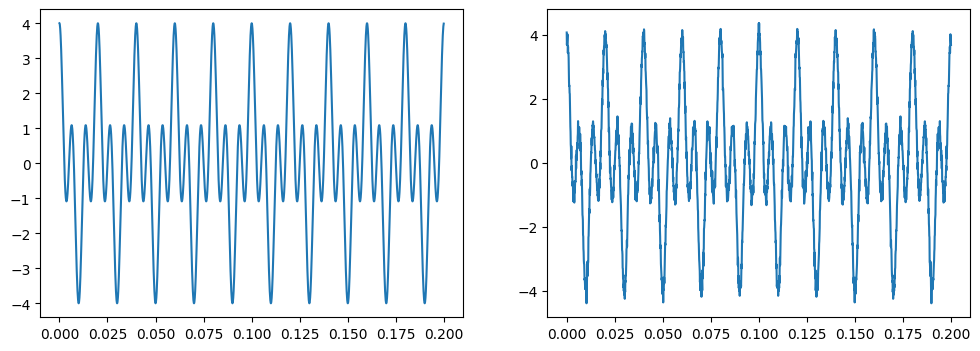

In [87]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cos_time, cos_ifft)

plt.subplot(1, 2, 2)
plt.plot(cos_time, cos_ifft_noisy)

plt.show()

<!-- а ведь когда-нибудь я перестану ложиться спать не раньше половины четвёртого ночи... эх -->

<!-- ## **TODO: 2 и 3**

Алсо, стоит разобраться, что означает y-шкала у последних 4 графиков (выше) и почему она отличается от y-шкалы на графиках ниже. -->

**(2)** Проделаем аналогичные операции с фукнцией периодического прямоугольного испульса:

In [88]:
def periodic_impulse(t, T):
    A = 2

    if t % T > T/2:
        return A

    return -A

In [101]:
impulse_time = np.arange(0, 4, 0.001)
impulse_values = list(map(lambda a: periodic_impulse(a, 2), impulse_time))

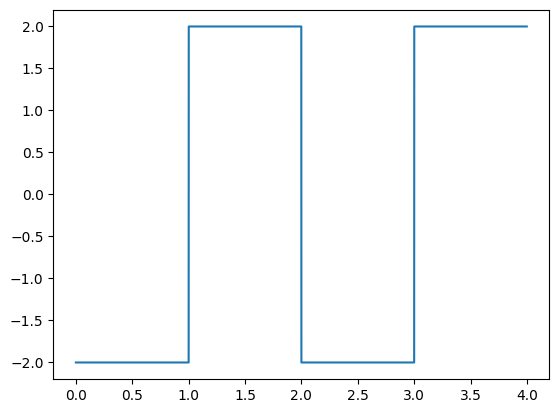

In [102]:
plt.plot(impulse_time, impulse_values)
plt.show()

In [103]:
impulse_frequencies = np.fft.fftfreq(len(impulse_time), 0.001)
impulse_dft = DFT_slow(impulse_values)
impulse_fft = np.fft.fft(impulse_values)

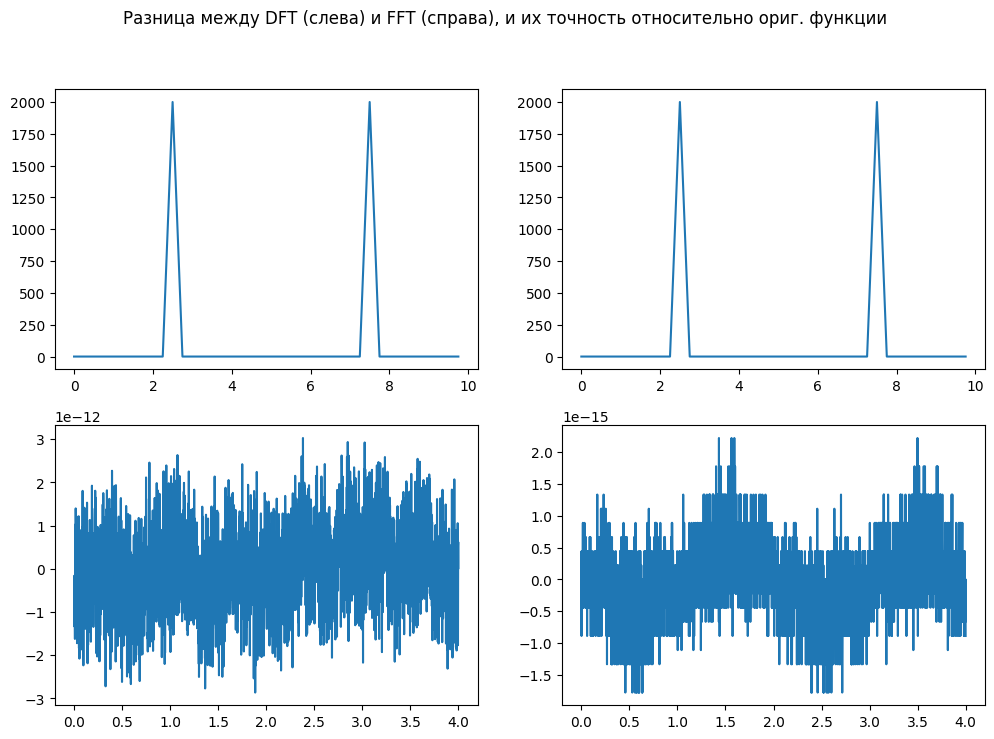

In [105]:
compare_DFT_FFT(impulse_time, impulse_frequencies, impulse_values, impulse_dft, impulse_fft, 50)

In [128]:
impulse_noisy = impulse_values + np.random.normal(0, 1, impulse_time.shape)

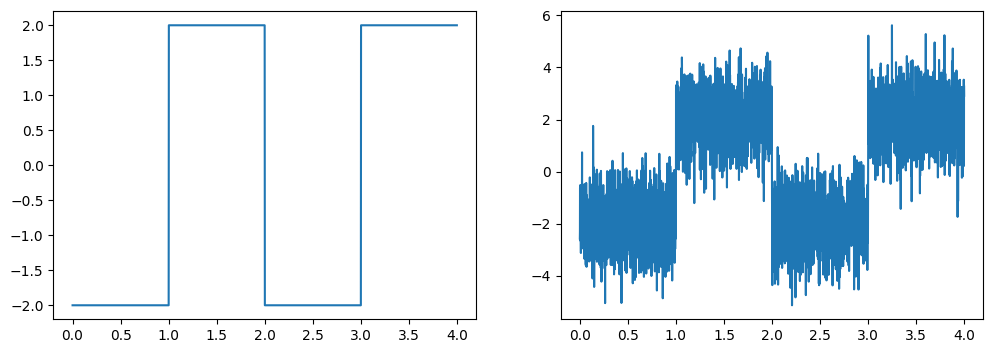

In [129]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(impulse_time, impulse_values)

plt.subplot(1, 2, 2)
plt.plot(impulse_time, impulse_noisy)

In [130]:
impulse_fft = np.fft.fft(impulse_values)
impulse_noisy_fft = np.fft.fft(impulse_noisy)

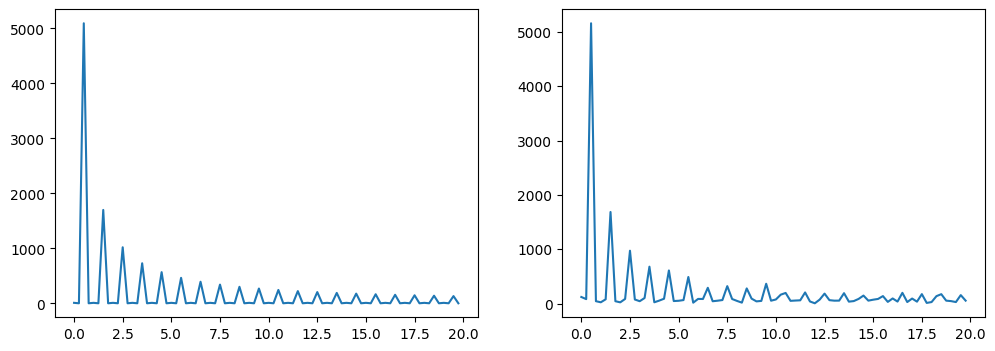

In [131]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(impulse_frequencies[0:len(impulse_frequencies)//50], np.abs(impulse_fft[0:len(impulse_frequencies)//50]))

plt.subplot(1, 2, 2)
plt.plot(impulse_frequencies[0:len(impulse_frequencies)//50], np.abs(impulse_noisy_fft[0:len(impulse_frequencies)//50]))


```
3. Реализовать код для определения быстрого дискретного преобразования Фурье
(БДПФ). Убедиться, что функция написана верно, для этого рассмотреть сигнал косинуса с
частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц. Сравните
время выполнения написанного кода для реализации (БДПФ) с встроенной функцией
(БДПФ) fft().

Замечание:
Теория быстрого преобразования Фурье представлена в методичке:
Козулин Цифровая обработка сигналов Python.pdf на странице 60-64
```